Importando Pandas e Warnings

In [221]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Guardando e lendo o dataset

In [222]:
dataset = pd.read_csv('base-alugueis-sp.csv', sep = ',')

In [223]:
dataset.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Checando por valores incongruentes

In [224]:
for col in dataset.columns:
    print(f"Coluna: {col}")
    print(dataset[col].unique())
    print("-" * 30)

Coluna: address
['Rua Herval' 'Avenida São Miguel' 'Rua Oscar Freire' ...
 'Avenida Doutor Alberto de Oliveira Lima' 'São José' 'Rua Abílio Borin']
------------------------------
Coluna: district
['Belenzinho' 'Vila Marieta' 'Pinheiros' ... 'Vila Elvira'
 'Jardim Vitoria Regia' 'Retiro Morumbi']
------------------------------
Coluna: area
[ 21  15  18  56  19  50  72  26  32  36  63  34  70  75  64  28  30  62
  40  54  59  25  80  24 100  48  35  33  68  69 110  29  44  61  11  60
  45  47  52  46  31  12  20  65  42  23  22  38  98  41  37 209 114  55
  90  78 120  39  51  43  71  87  67  94  85  14  27 350 150  57  76  49
 130  99 160  58  66 115  53  86  82 200  83 184  73  16  84 185 354  79
 106 126  91  96 101  95  81 223 207  74 135 267 166  97  77  93 180 156
  89   1 127 112  92  17 260   5 167 158 250 264 117 205 175 102 227 190
 224 165  88 240 125 136 121 164 151 109 140 300 103 230 141 107 172 232
 163 176 147 225  10 108 217 198 294 170   0 400 162 104 189 119 116 152
 1

Checando por valores nulos

In [225]:
dataset.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

Retirando linhas que tem valor de 'area' menor que 4.

In [226]:
dados_tratados = dataset.loc[dataset['area'] > 4]
dados_tratados.loc[dados_tratados['area'] < 4]

,address,district,area,bedrooms,garage,type,rent,total


Retirando linhas que tem 'bedrooms' igual a 0.

In [227]:
dados_tratados = dados_tratados.loc[dados_tratados['bedrooms'] != 0]
dados_tratados.loc[dados_tratados['bedrooms'] == 0]

,address,district,area,bedrooms,garage,type,rent,total


Redefinindo os tipos de residência como valores inteiros para serem estudados como possíveis variáveis explicativas.

In [228]:
mapeamento = {'Studio e kitnet': 0, 'Apartamento': 1, 'Casa em condomínio': 2, 'Casa': 3}
dados_tratados['type'] = dados_tratados['type'].replace(mapeamento)
dados_tratados['type']

0        0
1        0
2        1
3        2
4        0
        ..
11652    1
11653    1
11654    1
11655    1
11656    3
Name: type, Length: 11614, dtype: int64

Importando seaborn

In [229]:
import seaborn as sns

Checando por Outliers

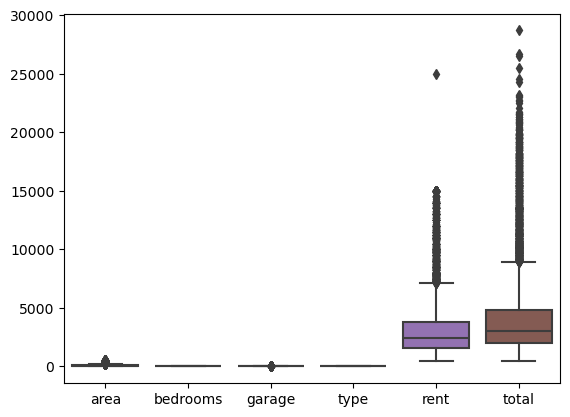

In [230]:
ax = sns.boxplot(dados_tratados)

Investigando possíveis outliers

In [231]:
dados_tratados.loc[dados_tratados['rent'] > 15000]

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,0,25000,26710


Retirando dados outliers

In [232]:
dados_tratados = dados_tratados.loc[dados_tratados['rent'] < 15000]

Checando outros possíveis outliers

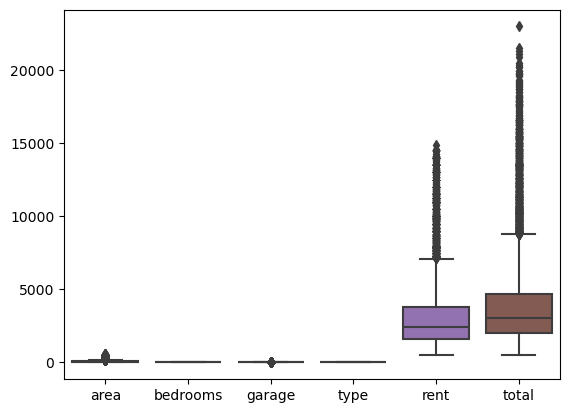

In [233]:
ax = sns.boxplot(dados_tratados)

In [234]:
dados_tratados.loc[dados_tratados['total'] > 22000]

,address,district,area,bedrooms,garage,type,rent,total
11178,Alameda Ministro Rocha Azevedo,Jardim Paulista,272,3,5,1,13600,22990


O valor parece ser um outlier, mas é congruente com as características do local.

Análise descritiva do dataframe

In [235]:
dados_tratados.describe()

,area,bedrooms,garage,type,rent,total
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,82.944348,1.958870,1.039478,1.389304,3136.788435,3937.245391
std,70.834788,0.915014,1.102933,0.979665,2384.484490,3013.835105
min,5.000000,1.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1.000000,1576.500000,1990.000000
50%,60.000000,2.000000,1.000000,1.000000,2400.000000,3037.500000
75%,95.000000,3.000000,1.000000,2.000000,3800.000000,4702.000000
max,580.000000,6.000000,6.000000,3.000000,14900.000000,22990.000000


In [236]:
dados_tratados[['rent', 'area', 'garage', 'bedrooms', 'type']].corr()

,rent,area,garage,bedrooms,type
rent,1.000000,0.651212,0.605825,0.532248,0.093058
area,0.651212,1.000000,0.721653,0.726464,0.447392
garage,0.605825,0.721653,1.000000,0.649273,0.289283
bedrooms,0.532248,0.726464,0.649273,1.000000,0.332287
type,0.093058,0.447392,0.289283,0.332287,1.000000


Observamos que 'area', 'garage' e 'bedrooms' se correlacionam com 'rent' de forma bastante relevante, e 'type' de maneira muito fraca.

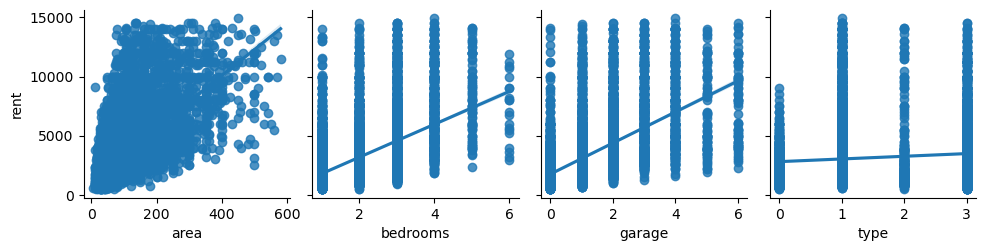

In [237]:
ax = sns.pairplot(dados_tratados, y_vars = 'rent', x_vars = ['area', 'bedrooms', 'garage', 'type'], kind='reg')

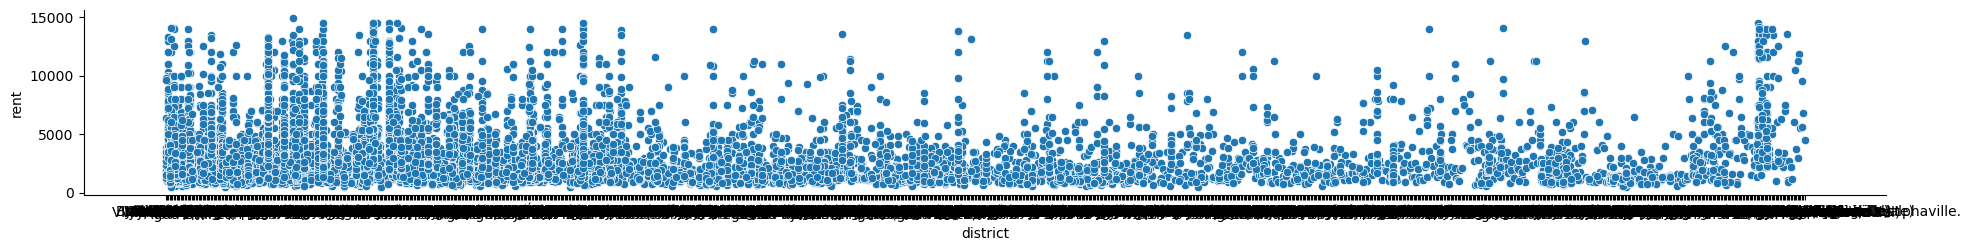

In [238]:
ax = sns.pairplot(dados_tratados, y_vars = 'rent', x_vars = ['district'], aspect=8)

Podemos observar uma correlação positiva e direta entre 'rent' & 'area', 'rent' & 'bedrooms' e 'rent' & 'garage', onde o valor de rent aumenta conforme os valores de 'area', 'bedroom' e 'garage' aumentam, 'type' também, mas muito levemente.
Já a variavel 'district', apesar do label no eixo X estar borrado, é notável que a distribuição de locais com alugueis variam bastante, onde há locais em que os valores de 'rent' se mostram mais uniformes em quase todo o alcance de 'rent', e outros em que se concentram mais em valores até 5000 e poucos acima disso.

In [239]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [240]:
y = dados_tratados['rent']

In [241]:
X = dados_tratados[['area', 'bedrooms', 'garage', 'type']]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [243]:
X_train

,area,bedrooms,garage,type
8413,48,1,0,0
3596,90,3,2,1
5876,30,1,0,1
8729,350,5,4,3
5260,50,1,1,1
...,...,...,...,...
6918,45,2,1,1
10704,435,4,6,3
7199,79,3,2,1
8702,142,3,2,3


In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
modelo = LinearRegression()

In [246]:
modelo.fit(X_train, y_train)

LinearRegression()

In [247]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.52


Aqui temos um coeficiente de determinação relevante, apesar de não ser alto. Isso significa que a linha de regressão se ajusta aos dados de maneira média.

In [248]:
y_previsto = modelo.predict(X_test)
y_previsto

array([8439.6762264 , 2285.18647663, 2422.22793416, ..., 2967.76450038,
       4771.95193492, 3861.03194684])

In [249]:
print('R² = %s' %metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.48


Aqui notamos que também há uma correlação de determinação relevante entre o 'y' teste e o 'y' previsto pelo modelo. A explicação ainda não é muito ajustada, mas tem valor médio.

In [250]:
dados_tratados.loc[dados_tratados['area'] == 70]

,address,district,area,bedrooms,garage,type,rent,total
14,Rua Orestes Barbosa,Jardim Paraventi,70,2,1,3,1600,1768
76,Rua Sete Barras,Vila Moinho Velho,70,2,1,1,3218,3832
103,Rua Doutor Ferreira Lopes,Vila Sofia,70,3,2,1,2100,3315
109,Avenida Diógenes Ribeiro de Lima,Alto da Lapa,70,2,1,1,2450,2955
178,Rua Guaraja,Vila Mazzei,70,2,1,1,1600,2131
...,...,...,...,...,...,...,...,...
11506,Avenida Delmar,Alphaville Empresarial,70,2,1,1,5750,6609
11547,Rua do Golfinho,Jardim Paraiso,70,2,2,1,3386,3516
11623,Rua Jupi,Santo Amaro,70,3,1,1,4100,4607
11638,Avenida João Dias,Santo Amaro,70,2,1,1,3120,4215


In [251]:
entrada = [[70, 2, 1, 3]]

In [252]:
modelo.predict(entrada)

array([1936.2044312])

In [253]:
residuo_modelo = 1966.3 - 1600
residuo_modelo

366.29999999999995

O modelo tem prevê em volta do preço real, mas falta exatidão nas previsões por existirem fatores ainda não contabilizados, como a flutuação dos preços de acordo com o local de residência.
Fora isso, o modelo traz a mesma tendência de aumento do aluguel junto com área, quantidade de quartos, vagas de garagem, e do tipo da residência.